<a href="https://colab.research.google.com/github/rebeca-klamerick/Introducao_pandas/blob/main/An%C3%A1lise_pre%C3%A7o_Im%C3%B3vel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Análise de preço de aluguel de imóvel**
Esta análise consite em avaliar preço de aluguel de imóveis em algumas cidades da europa e então descidir pelo gosto do cliente através de sua necessidade um apartamento ideal. É um conjunto de dados meramente ilustrativo com teor educacional de como utilizar algumas biblioteca como pandas e biblioteca de visualização como seaborn ou matplotlib, para iniciarmos utilizamos a função import para chamar as bibliotecas necessárias.

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

A função pd.read do pandas importa a base para dentro do notebook, neste caso como arquivo esta no google colab basta chamar o nome e a extensão do arquivo

In [ ]:
aluguel_casa = pd.read_excel('houses_rent.xlsx')
aluguel_casa.head()

,index,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa,rent amount,property tax,fire insurance,total
0,0,Barcelona,240,3,3,4,-,accept,furnished,600,8000,1000,121,9121
1,1,Porto,64,2,1,1,10,accept,not furnished,540,820,122,11,1493
2,2,Barcelona,443,5,5,4,3,accept,furnished,4172,7000,1417,89,12680
3,3,Barcelona,73,2,2,1,12,accept,not furnished,700,1250,150,16,2116
4,4,Barcelona,19,1,1,0,-,not accept,not furnished,0,1200,41,16,1257


Como boas práticas de programação o ideal é trocar nome de variáveis removendo espaços, para isto utilizamos a função rename columns o primeiro argumento é o nome atual e o segundo será o nome para qual trocaremos o nome.

In [ ]:
aluguel_casa = aluguel_casa.rename(columns={'parking spaces': 'parking_spaces', "rent amount":'rent_amount', "property tax" : "property_tax", "fire insurance": 'fire_insurance'})
aluguel_casa.head()

,index,city,area,rooms,bathroom,parking_spaces,floor,animal,furniture,hoa,rent_amount,property_tax,fire_insurance,total
0,0,Barcelona,240,3,3,4,-,accept,furnished,600,8000,1000,121,9121
1,1,Porto,64,2,1,1,10,accept,not furnished,540,820,122,11,1493
2,2,Barcelona,443,5,5,4,3,accept,furnished,4172,7000,1417,89,12680
3,3,Barcelona,73,2,2,1,12,accept,not furnished,700,1250,150,16,2116
4,4,Barcelona,19,1,1,0,-,not accept,not furnished,0,1200,41,16,1257


Outro fator de extrema importancia é sempre olhar o tipo de variáveis a situação em que há um numero inteiro ou float que podem vir com caracter por algum motivo e o analista não consegue realizar operações matemática. a função dtypes ja retorna o tipo de cada variável

In [ ]:
aluguel_casa.dtypes

,0
index,int64
city,object
area,int64
rooms,int64
bathroom,int64
parking_spaces,int64
floor,object
animal,object
furniture,object
hoa,object


A função dtype mostra como as variáveis estão e da astype transforma para o tipo que o analista necessita

In [ ]:
aluguel_casa = aluguel_casa.astype({'rent_amount': 'float64', 'property_tax': 'float64', 'fire_insurance': 'float64','total': 'float64'})

In [ ]:
aluguel_casa.head()

,index,city,area,rooms,bathroom,parking_spaces,floor,animal,furniture,hoa,rent_amount,property_tax,fire_insurance,total
0,0,Barcelona,240,3,3,4,-,accept,furnished,600,8000.0,1000.0,121.0,9121.0
1,1,Porto,64,2,1,1,10,accept,not furnished,540,820.0,122.0,11.0,1493.0
2,2,Barcelona,443,5,5,4,3,accept,furnished,4172,7000.0,1417.0,89.0,12680.0
3,3,Barcelona,73,2,2,1,12,accept,not furnished,700,1250.0,150.0,16.0,2116.0
4,4,Barcelona,19,1,1,0,-,not accept,not furnished,0,1200.0,41.0,16.0,1257.0


In [ ]:
aluguel_casa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6080 entries, 0 to 6079
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   index           6080 non-null   int64  
 1   city            6080 non-null   object 
 2   area            6080 non-null   int64  
 3   rooms           6080 non-null   int64  
 4   bathroom        6080 non-null   int64  
 5   parking_spaces  6080 non-null   int64  
 6   floor           6080 non-null   object 
 7   animal          6080 non-null   object 
 8   furniture       6080 non-null   object 
 9   hoa             6080 non-null   object 
 10  rent_amount     6080 non-null   float64
 11  property_tax    6080 non-null   float64
 12  fire_insurance  6080 non-null   float64
 13  total           6080 non-null   float64
dtypes: float64(4), int64(5), object(5)
memory usage: 665.1+ KB


Para acessar todas as colunas do data.frame e realizar operçações podemos chama-los como se fossem lista entre cochetes duplos e então fazer uma função que calcula análises descritivas de forma bem eficiente

In [ ]:
aluguel_casa[["area", "rooms", "bathroom", "parking_spaces", "rent_amount", "property_tax", "fire_insurance", "total"]].describe()

,area,rooms,bathroom,parking_spaces,rent_amount,property_tax,fire_insurance,total
count,6080.000000,6080.000000,6080.000000,6080.000000,6080.000000,6080.000000,6080.000000,6080.000000
mean,151.143914,2.492599,2.341612,1.756250,4395.844408,490.533224,58.204276,6033.194572
std,375.559485,1.129665,1.438860,1.611909,3576.668946,6212.549484,49.313441,8751.347700
min,10.000000,1.000000,1.000000,0.000000,420.000000,0.000000,3.000000,660.000000
25%,58.000000,2.000000,1.000000,1.000000,1800.000000,34.000000,23.000000,2451.500000
50%,100.000000,3.000000,2.000000,1.000000,3111.000000,145.000000,41.000000,4128.500000
75%,200.000000,3.000000,3.000000,2.000000,5952.500000,458.000000,77.000000,8074.000000
max,24606.000000,10.000000,10.000000,12.000000,45000.000000,366300.000000,677.000000,372700.000000


Supondo que o cliente não queria nenhum imóvel com preço superior a 4000 logo podemos restringir o campo da busca pelo total realizando a seguinte operação.

In [ ]:
aluguel_casa = aluguel_casa[(aluguel_casa['total']<=4000)]
aluguel_casa.head()

,index,city,area,rooms,bathroom,parking_spaces,floor,animal,furniture,hoa,rent_amount,property_tax,fire_insurance,total
1,1,Porto,64,2,1,1,10,accept,not furnished,540,820.0,122.0,11.0,1493.0
3,3,Barcelona,73,2,2,1,12,accept,not furnished,700,1250.0,150.0,16.0,2116.0
4,4,Barcelona,19,1,1,0,-,not accept,not furnished,0,1200.0,41.0,16.0,1257.0
5,5,Barcelona,13,1,1,0,2,accept,not furnished,0,2200.0,42.0,28.0,2270.0
7,7,Barcelona,55,2,2,1,2,accept,not furnished,600,1300.0,67.0,17.0,1984.0


Abaixo temos mais uma premissa de negócio supondo que o cliente esta em busca de um valor menor que 4000 e que aceite animais de estimação então utilizaremos a condição e para as duas condições serem verdadeiras

In [ ]:
aluguel_casa = aluguel_casa[(aluguel_casa['total']<=4000) & (aluguel_casa["animal"]=="accept")]
aluguel_casa.head()

,index,city,area,rooms,bathroom,parking_spaces,floor,animal,furniture,hoa,rent_amount,property_tax,fire_insurance,total
1,1,Porto,64,2,1,1,10,accept,not furnished,540,820.0,122.0,11.0,1493.0
3,3,Barcelona,73,2,2,1,12,accept,not furnished,700,1250.0,150.0,16.0,2116.0
5,5,Barcelona,13,1,1,0,2,accept,not furnished,0,2200.0,42.0,28.0,2270.0
7,7,Barcelona,55,2,2,1,2,accept,not furnished,600,1300.0,67.0,17.0,1984.0
8,8,Barcelona,82,3,1,1,3,accept,furnished,828,2000.0,109.0,26.0,2963.0


A próxima suposição são as duas anteriores e que a casa possua dois ou três quartos

In [ ]:
aluguel_casa = aluguel_casa[(aluguel_casa['total']<=4000) & (aluguel_casa["animal"]=="accept") & (aluguel_casa["rooms"]==2) | (aluguel_casa["rooms"]==3)]
aluguel_casa.head()

,index,city,area,rooms,bathroom,parking_spaces,floor,animal,furniture,hoa,rent_amount,property_tax,fire_insurance,total
1,1,Porto,64,2,1,1,10,accept,not furnished,540,820.0,122.0,11.0,1493.0
3,3,Barcelona,73,2,2,1,12,accept,not furnished,700,1250.0,150.0,16.0,2116.0
7,7,Barcelona,55,2,2,1,2,accept,not furnished,600,1300.0,67.0,17.0,1984.0
8,8,Barcelona,82,3,1,1,3,accept,furnished,828,2000.0,109.0,26.0,2963.0
15,15,Porto,56,2,1,1,1,accept,not furnished,345,950.0,11.0,13.0,1319.0


In [ ]:
aluguel_casa.describe()
aluguel_casa2 = aluguel_casa.copy()
aluguel_casa2.head()

,index,city,area,rooms,bathroom,parking_spaces,floor,animal,furniture,hoa,rent_amount,property_tax,fire_insurance,total
1,1,Porto,64,2,1,1,10,accept,not furnished,540,820.0,122.0,11.0,1493.0
3,3,Barcelona,73,2,2,1,12,accept,not furnished,700,1250.0,150.0,16.0,2116.0
5,5,Barcelona,13,1,1,0,2,accept,not furnished,0,2200.0,42.0,28.0,2270.0
7,7,Barcelona,55,2,2,1,2,accept,not furnished,600,1300.0,67.0,17.0,1984.0
8,8,Barcelona,82,3,1,1,3,accept,furnished,828,2000.0,109.0,26.0,2963.0


O código abaixo é so uma forma de fazer o mesmo exercícios porém utilizando a função .query que é relativamente simples e possui a mesma sitaxe de linguagem sql

In [ ]:
aluguel_casa = aluguel_casa.query(("total<=4000 and animal == 'accept' and rooms==2 or rooms==3"))
aluguel_casa.head()

,index,city,area,rooms,bathroom,parking_spaces,floor,animal,furniture,hoa,rent_amount,property_tax,fire_insurance,total
1,1,Porto,64,2,1,1,10,accept,not furnished,540,820.0,122.0,11.0,1493.0
3,3,Barcelona,73,2,2,1,12,accept,not furnished,700,1250.0,150.0,16.0,2116.0
7,7,Barcelona,55,2,2,1,2,accept,not furnished,600,1300.0,67.0,17.0,1984.0
8,8,Barcelona,82,3,1,1,3,accept,furnished,828,2000.0,109.0,26.0,2963.0
15,15,Porto,56,2,1,1,1,accept,not furnished,345,950.0,11.0,13.0,1319.0


Vamos fazer um agrupamento pelo cidade e o total retornando a média dos valores dos preços

In [ ]:
agg_city_price = aluguel_casa.groupby('city')['total'].mean()
agg_city_price

,total
city,
Barcelona,2683.503759
Porto,2161.947522


In [ ]:
agg_city_price = aluguel_casa.groupby(["city"])["total"].agg("mean").reset_index()
agg_city_price

,city,total
0,Barcelona,2683.503759
1,Porto,2161.947522


O proximo agrupamento vamos utilizar o número de banheiros e quarto como argumento.

In [ ]:
agg_bath_room_price = aluguel_casa.groupby(["bathroom", "rooms"])["total"].agg("mean").reset_index()
agg_bath_room_price

,bathroom,rooms,total
0,1,2,2091.175221
1,1,3,2542.509091
2,2,2,2734.612903
3,2,3,2928.720395
4,3,2,3057.440000
5,3,3,3217.704545
6,4,2,3136.000000
7,4,3,3461.133333
8,5,3,3245.000000
9,6,3,3101.000000


Para facilitar a visualização podemos fazer gráficos representando a quantidades de quartos e posteriormente a quantidade de banheiros

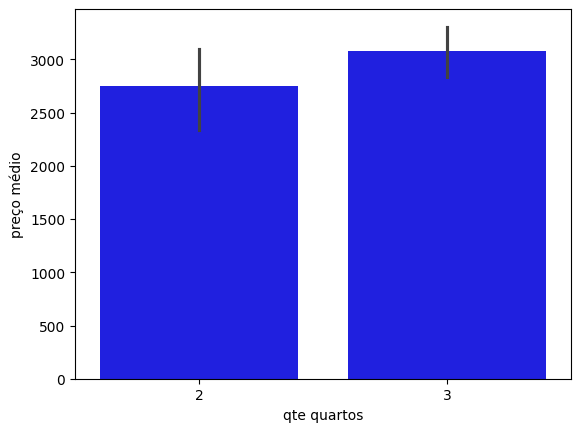

In [ ]:
ax = sns.barplot(data=agg_bath_room_price, x="rooms", y="total", color="blue");
ax.set(xlabel="qte quartos", ylabel ="preço médio");

Nota-se que casda com maiores números de quartos tendem a ter uma média maior de preços

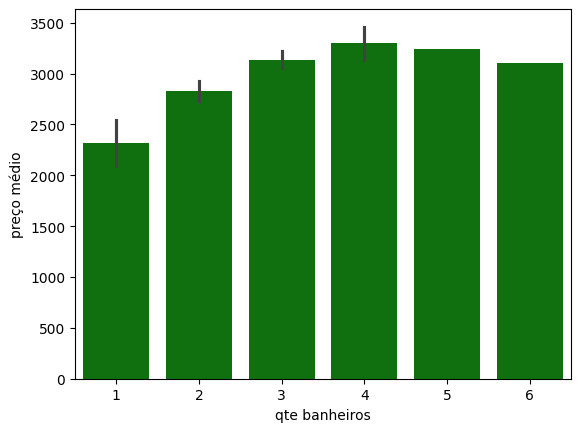

In [ ]:
ax = sns.barplot(data=agg_bath_room_price, x="bathroom", y="total", color="green");
ax.set(xlabel="qte banheiros", ylabel ="preço médio");

In [ ]:
agg_area = aluguel_casa[["area"]]

Vamos avaliar apartamentos com ares menores que 100 metros

In [ ]:
agg_area =  agg_area.query("area<=100")
agg_area.describe()


,area
count,1064.000000
mean,69.641917
std,15.962461
min,30.000000
25%,57.000000
50%,69.000000
75%,80.000000
max,100.000000


<Axes: xlabel='area', ylabel='Count'>

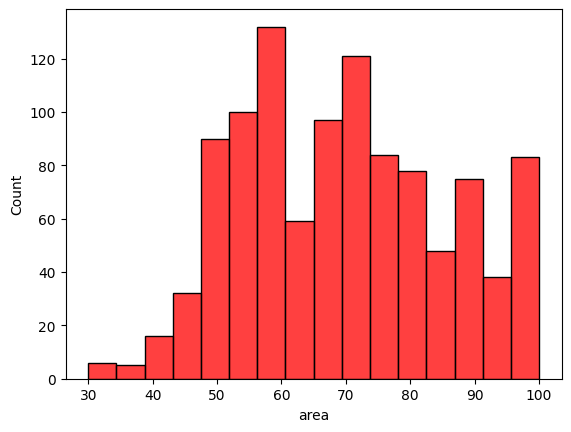

In [ ]:
sns.histplot(data=agg_area, x="area", color="red")

In [ ]:
aluguel_casa = aluguel_casa.query("area<=100")
aluguel_casa.head()

,index,city,area,rooms,bathroom,parking_spaces,floor,animal,furniture,hoa,rent_amount,property_tax,fire_insurance,total
1,1,Porto,64,2,1,1,10,accept,not furnished,540,820.0,122.0,11.0,1493.0
3,3,Barcelona,73,2,2,1,12,accept,not furnished,700,1250.0,150.0,16.0,2116.0
7,7,Barcelona,55,2,2,1,2,accept,not furnished,600,1300.0,67.0,17.0,1984.0
8,8,Barcelona,82,3,1,1,3,accept,furnished,828,2000.0,109.0,26.0,2963.0
15,15,Porto,56,2,1,1,1,accept,not furnished,345,950.0,11.0,13.0,1319.0


Podemos notar que após todas as restriçoes temos apartamento apenas na cidade de Porto e Barcelona que atende os requisitos do cliente. Abaixo um gráfico que representa a distribuição dos imóveis nestas duas cidades

<Axes: xlabel='total', ylabel='Count'>

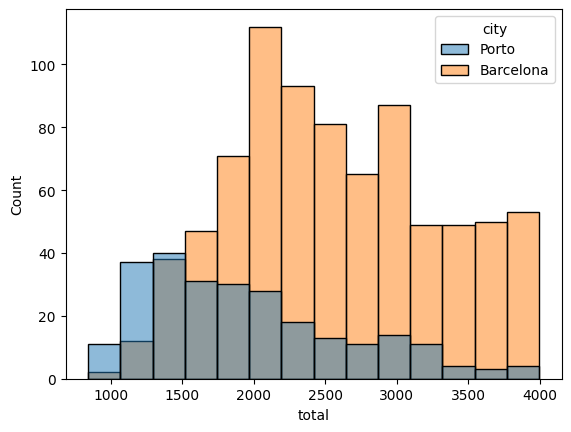

In [ ]:
sns.histplot(data= aluguel_casa, x = 'total', hue = 'city')

In [ ]:
aluguel_casa.head()

,index,city,area,rooms,bathroom,parking_spaces,floor,animal,furniture,hoa,rent_amount,property_tax,fire_insurance,total
1,1,Porto,64,2,1,1,10,accept,not furnished,540,820.0,122.0,11.0,1493.0
3,3,Barcelona,73,2,2,1,12,accept,not furnished,700,1250.0,150.0,16.0,2116.0
7,7,Barcelona,55,2,2,1,2,accept,not furnished,600,1300.0,67.0,17.0,1984.0
8,8,Barcelona,82,3,1,1,3,accept,furnished,828,2000.0,109.0,26.0,2963.0
15,15,Porto,56,2,1,1,1,accept,not furnished,345,950.0,11.0,13.0,1319.0


In [22]:
agg_floor_price = aluguel_casa.groupby(["floor"])["total"].agg("mean").reset_index()
agg_floor_price

,floor,total
0,1,2322.350993
1,2,2243.976744
2,3,2179.811475
3,4,2433.342857
4,5,2632.298246
5,6,2676.062500
6,7,2461.528571
7,8,2654.463415
8,9,2793.657895
9,10,2713.457143


<Axes: xlabel='floor', ylabel='total'>

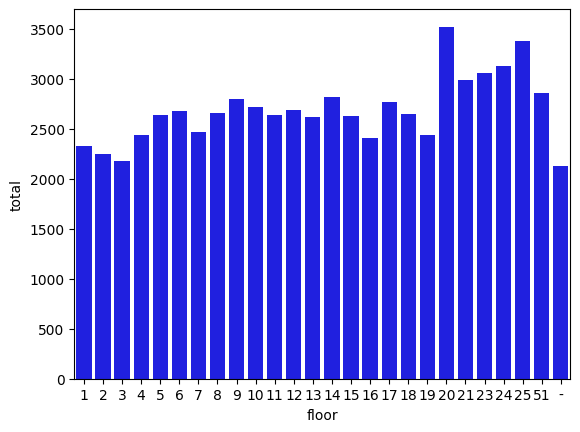

In [24]:
sns.barplot(data=agg_floor_price, x="floor", y="total", color="blue")

Supondo que em prédios mais altos tende a valorizar mais no futuro o apartamento do 16 andar tem custo benefícios bom, logo ele é um ponto de atenção

In [26]:
sixtin_flor = aluguel_casa.query("floor == 16")
sixtin_flor.head()

,index,city,area,rooms,bathroom,parking_spaces,floor,animal,furniture,hoa,rent_amount,property_tax,fire_insurance,total
133,133,Barcelona,57,2,2,2,16,accept,not furnished,510,1690.0,11.0,22.0,2233.0
1709,1709,Barcelona,54,2,2,1,16,accept,not furnished,665,2200.0,117.0,28.0,3010.0
1843,1843,Porto,100,2,1,0,16,accept,not furnished,550,900.0,61.0,12.0,1523.0
2450,2450,Barcelona,41,2,1,0,16,accept,not furnished,270,1200.0,0.0,16.0,1486.0
2851,2851,Barcelona,47,2,1,1,16,accept,not furnished,450,1350.0,0.0,18.0,1818.0


Com todas as restrições acima temos essas opções de apartamento e então o cliente verifica uma visita saindo de varias opções para algumas opções esse é um conjunto exemplo de apenas estatísticas descritivas